In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [7]:
path = "C:\\Users\\AdmCT\\OneDrive\\Documentos\\GitHub\\mulherescomputacao\\Proplan\\DadosRebeca.csv"
df = pd.read_csv(path)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2458 non-null   int64  
 1   NOME_ALUNO         2458 non-null   object 
 2   SEXO               2458 non-null   object 
 3   IDADE              2451 non-null   float64
 4   ESTADO_CIVIL       2434 non-null   object 
 5   ETNIA              2458 non-null   object 
 6   COD_CURSO          2458 non-null   int64  
 7   NOME_CURSO         2458 non-null   object 
 8   ANO_INGRESSO       2458 non-null   int64  
 9   FORMA_INGRESSO     2458 non-null   object 
 10  PERIODO_INGRESSO   2458 non-null   object 
 11  ANO_EVASAO         2458 non-null   int64  
 12  PERIODO_EVASAO     1609 non-null   object 
 13  FORMA_EVASAO       2458 non-null   object 
 14  NUM_PERIODOS       2458 non-null   int64  
 15  NUM_MAX_PERIODOS   2458 non-null   int64  
 16  CH_TOTAL_CURSO     2458 

In [9]:
sns.set_theme(style="whitegrid", palette="pastel")

In [10]:
cotistas = df[df['COTISTA'] == 'S']
masc = df[df['SEXO'] == 'M'] 
femi = df[df['SEXO'] == 'F']
cc_femi = femi[femi["COD_CURSO"] == 11]
eng_femi = femi[femi["COD_CURSO"] == 5]
cc_masc = masc[masc["COD_CURSO"] == 11]
eng_masc = masc[masc["COD_CURSO"] == 5]
eng = df[df['COD_CURSO'] == 5]
ccomp = df[df["COD_CURSO"] == 11]
formados = df[df["FORMA_EVASAO"] == "Formado"]
desistentes = df[df["FORMA_EVASAO"] == "Formado"]
cursando = df[df["FORMA_EVASAO"] == "Sem evasão"]
cotas_eng = cotistas[cotistas["COD_CURSO"] == 5]
cotas_cc = cotistas[cotistas["COD_CURSO"] == 11]

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

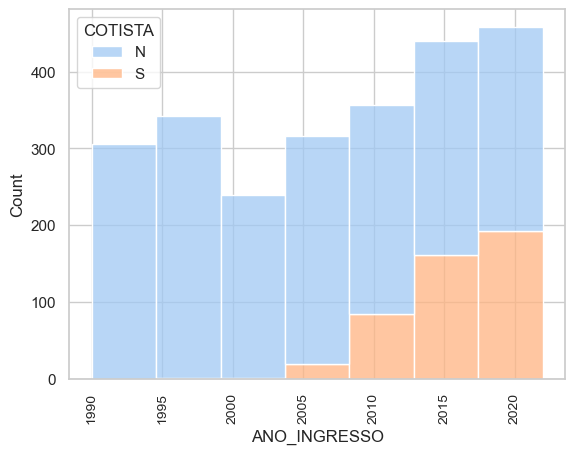

In [41]:
sns.histplot(df, x='ANO_INGRESSO', hue="COTISTA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

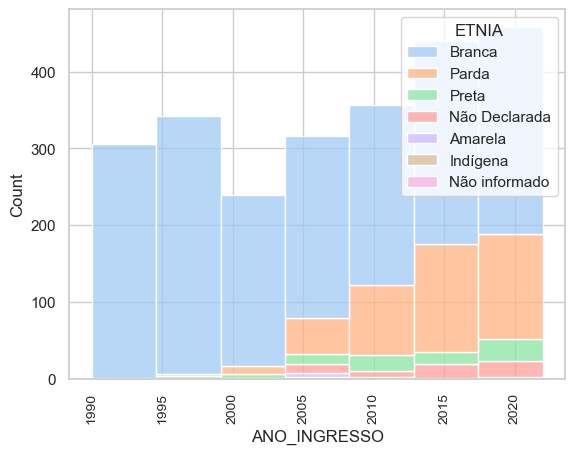

In [39]:
sns.histplot(df, x='ANO_INGRESSO', hue="ETNIA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

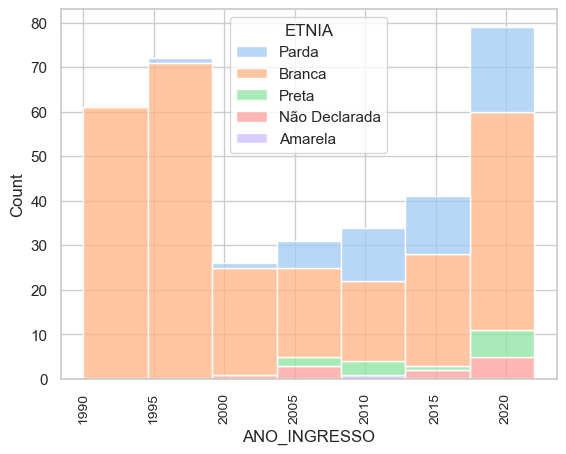

In [42]:
sns.histplot(femi, x='ANO_INGRESSO', hue="ETNIA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)

## Distribuição dos Gêneros

## Idade - Medidas de Centralidade

In [319]:
df_idade = df["IDADE"]

In [320]:
df_idade.describe()

count    2451.000000
mean       19.975561
std         3.696133
min        16.000000
25%        18.100000
50%        18.900000
75%        20.300000
max        58.200000
Name: IDADE, dtype: float64

In [321]:
df.groupby("SEXO")['IDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,342.0,19.331871,2.305408,16.5,18.0,18.7,19.8,34.7
M,2109.0,20.079943,3.865220,16.0,18.1,18.9,20.4,58.2


In [322]:
femi.mode()

,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,14,Aluno 1007,F,18.5,Solteiro(a),Branca,11.0,Ciência da Computação,2022.0,Vestibular,...,15.0,2910.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,19,Aluno 1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,Aluno 1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43,Aluno 1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,Aluno 1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2392,Aluno 970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,2395,Aluno 983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,2427,Aluno 984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2451,Aluno 985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
masc.mode()

,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,0,Aluno 1,M,18.1,Solteiro(a),Branca,5.0,Engenharia de Computação,2009.0,Vestibular,...,15.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1,Aluno 10,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Aluno 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Aluno 1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aluno 1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,2456,Aluno 995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,2457,Aluno 996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,2458,Aluno 997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2112,2459,Aluno 998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
eng_masc.mode()

,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,0,Aluno 1,M,18.1,Solteiro(a),Branca,5.0,Engenharia de Computação,2016.0,Vestibular,...,18.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1,Aluno 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Aluno 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Aluno 1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aluno 1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1371,Aluno 995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,1372,Aluno 996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,1373,Aluno 997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210,1374,Aluno 998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
def comparative_plots(df,figsize=(20,15),nrows=1,ncols=2):
    masc = df[df['SEXO'] == 'M'] 
    femi = df[df['SEXO'] == 'F']

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    sns.histplot(data=masc,x="IDADE",ax=ax[0])
    sns.histplot(data=femi,x="IDADE",ax=ax[1])

    ax[0].set_title("Homens")
    ax[1].set_title("Mulheres")
    

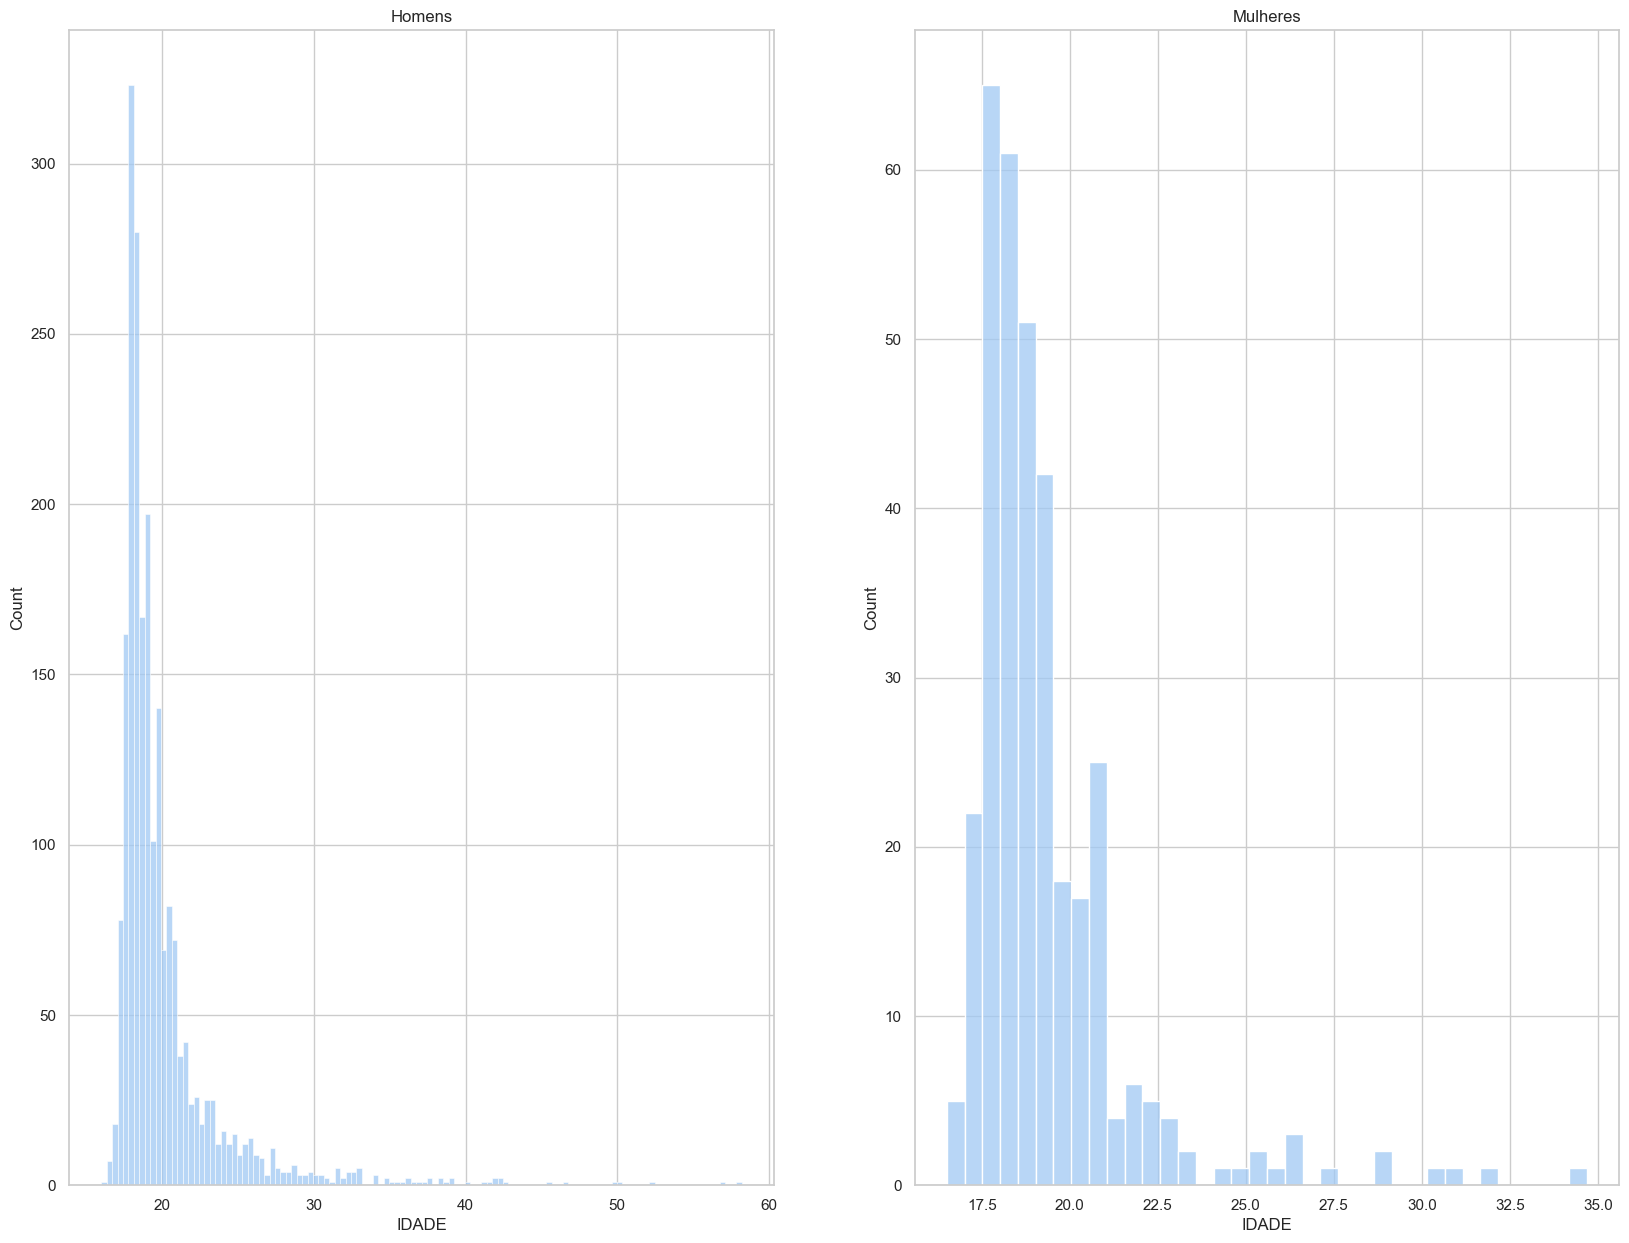

In [326]:
comparative_plots(df)

## Gráficos de Dispersão

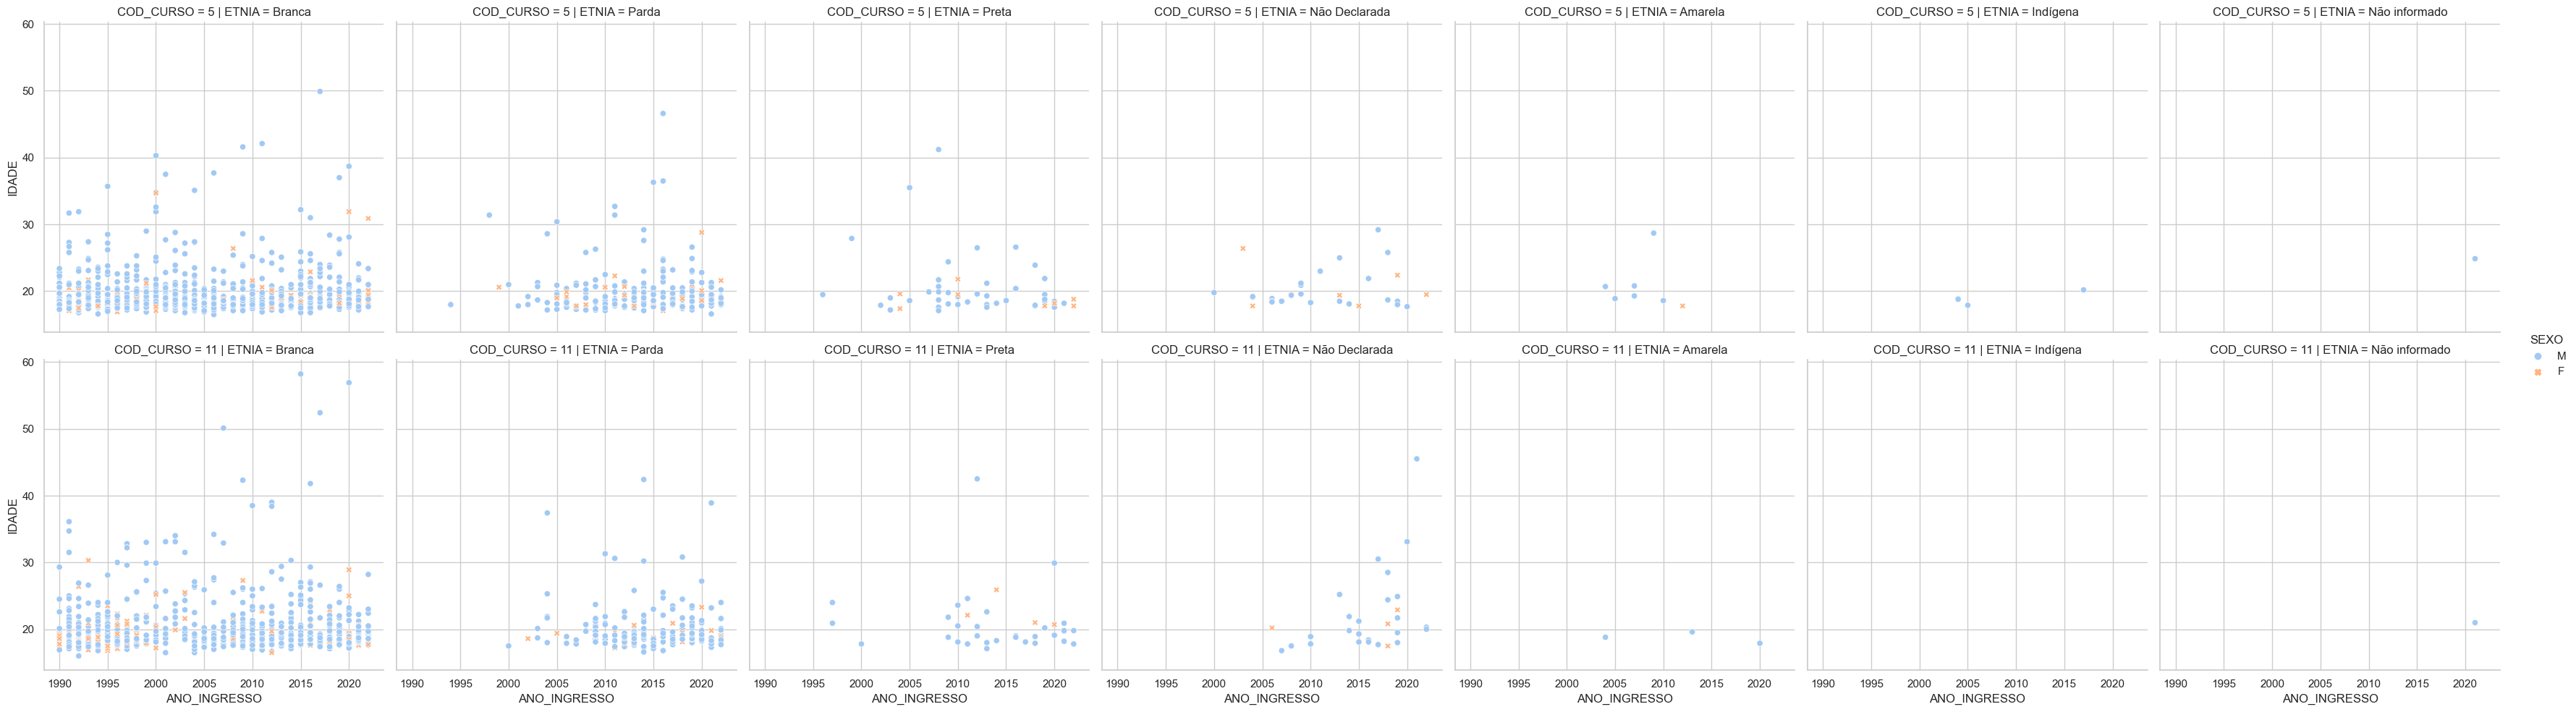

In [327]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE",col="ETNIA",hue="SEXO",row="COD_CURSO",style="SEXO")

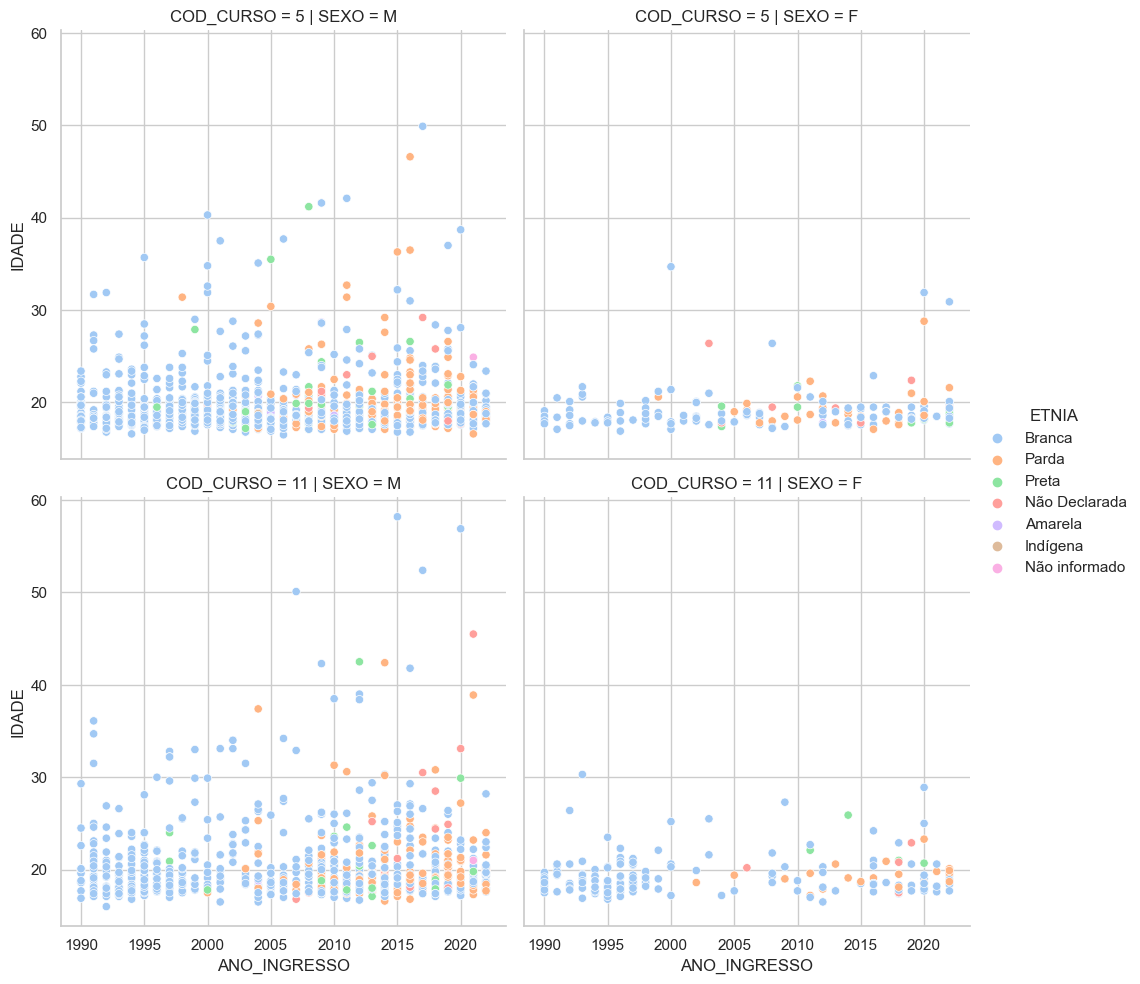

In [328]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE",col="SEXO",hue="ETNIA",row="COD_CURSO")

In [329]:
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="SEXO",hue="ETNIA",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="ETNIA",hue="SEXO",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",hue="Forna de Evasão",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="COD_CURSO",hue="SEXO")
#sns.displot(df, x="ANO_INGRESSO", hue="Forna de Evasão", kind="ecdf",col="SEXO")
#sns.displot(df, x="CRA", hue="Forna de Evasão", kind="ecdf",col="SEXO")

Text(0.5, 1.0, 'Geral')

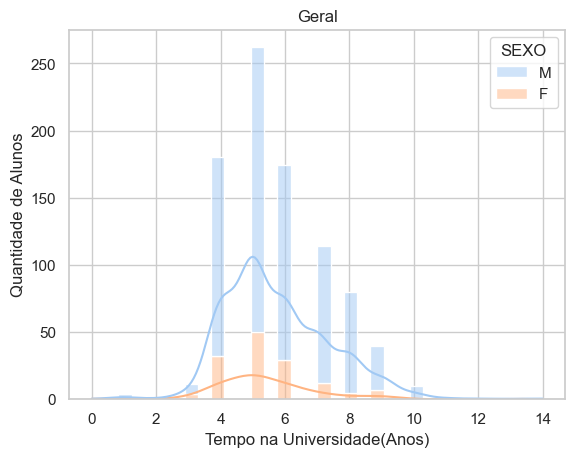

In [330]:
sns.histplot(data=formados, x="TEMPO_NA_UFES", hue="SEXO",multiple="stack",kde=True)
plt.ylabel('Quantidade de Alunos')
plt.xlabel('Tempo na Universidade(Anos)')
plt.title("Geral")

In [331]:
formados_cc = formados[formados["COD_CURSO"] == 11]
formados_ec = formados[formados["COD_CURSO"] == 5]

In [332]:
formados.groupby("SEXO")["TEMPO_NA_UFES"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,142.0,5.387324,1.610465,0.0,4.0,5.0,6.0,13.0
M,740.0,5.820270,1.621530,1.0,5.0,5.0,7.0,14.0


In [333]:
formados_cc.groupby("SEXO")["TEMPO_NA_UFES"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,81.0,5.172840,1.081551,3.0,4.0,5.0,6.0,8.0
M,233.0,5.648069,1.544096,1.0,5.0,5.0,7.0,10.0


In [334]:
formados_ec.groupby("SEXO")["TEMPO_NA_UFES"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,61.0,5.672131,2.095402,0.0,4.0,5.0,7.0,13.0
M,507.0,5.899408,1.651368,1.0,5.0,6.0,7.0,14.0


<AxesSubplot:xlabel='ANO_INGRESSO', ylabel='Count'>

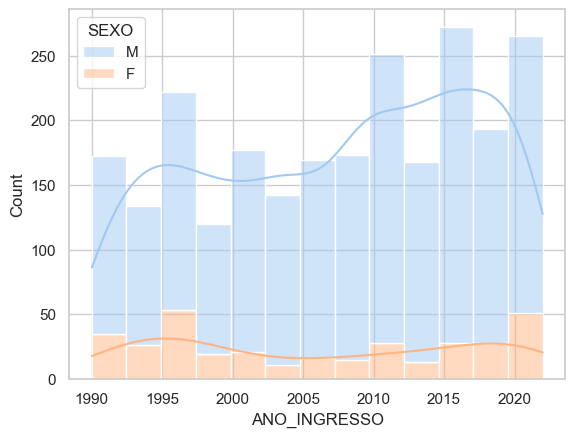

In [335]:
sns.histplot(data=df, x="ANO_INGRESSO",kde=True, hue="SEXO",multiple="stack")

In [336]:
df_freq_feme= pd.DataFrame(femi["ANO_INGRESSO"].value_counts())
df_freq_feme["SEXO"] = "F"
df_freq_masc = pd.DataFrame(masc["ANO_INGRESSO"].value_counts())
df_freq_masc["SEXO"] = "M"

df_freq = pd.concat([df_freq_feme,df_freq_masc],axis=0)

In [337]:
df_freq.rename(columns={"ANO_INGRESSO":"FREQUENCIA"},inplace=True)

In [338]:
df_freq

,FREQUENCIA,SEXO
2022,23,F
2020,21,F
1996,19,F
1995,18,F
1997,16,F
...,...,...
2002,50,M
2006,50,M
1992,49,M
1998,49,M


Text(0.5, 1.0, 'Geral')

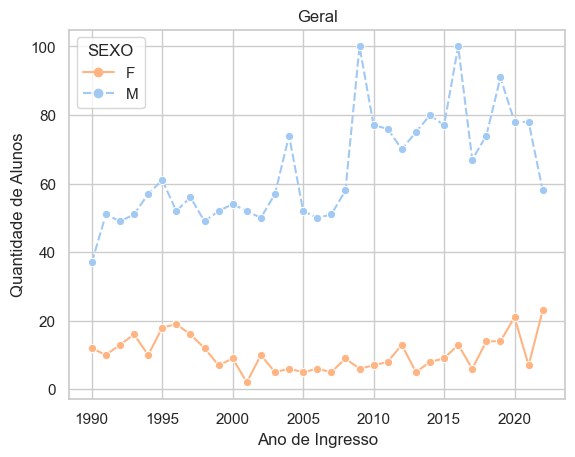

In [339]:
palette ={"M": "C0", "F": "C1"}
ax = sns.lineplot(data=df_freq,y=df_freq["FREQUENCIA"], x=df_freq.index, hue="SEXO", style="SEXO", markers=["o",'o'],palette=palette,)
#ax.set_xticks(df.ANO_INGRESSO.values)
#plt.xticks(fontsize=10,rotation=90)
plt.ylabel('Quantidade de Alunos')
plt.xlabel('Ano de Ingresso')
plt.title("Geral")

Text(0.5, 1.0, 'Ciência da Computação')

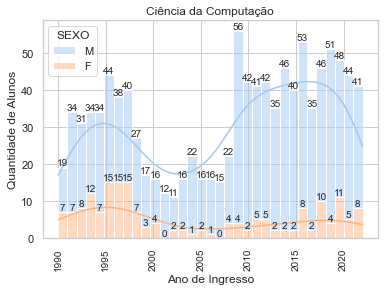

In [27]:
ax = sns.histplot(data=ccomp, x="ANO_INGRESSO",kde=True, hue="SEXO",multiple="stack",bins=33)
for i in ax.containers:
    ax.bar_label(i,fontsize=10)
#ax.set_xticks(df.ANO_INGRESSO.values)
plt.xticks(fontsize=10,rotation=90)
plt.ylabel('Quantidade de Alunos')
plt.xlabel('Ano de Ingresso')
plt.title("Ciência da Computação")

In [341]:
df_eng = df.loc[df["COD_CURSO"] == 5]
df_cie = df.loc[df["COD_CURSO"] == 11]

Text(0.5, 1.0, 'Ciência da Computação - Mulheres')

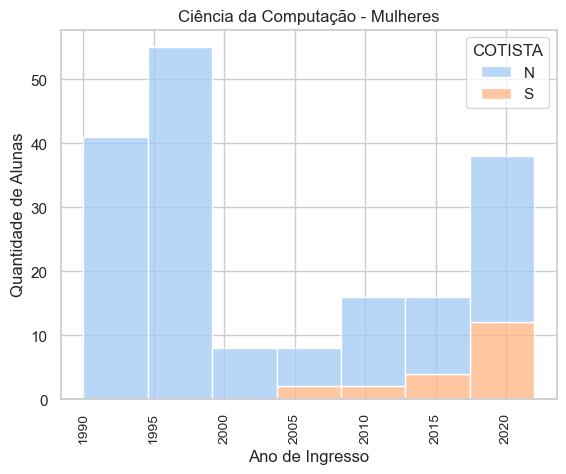

In [20]:
sns.histplot(data=cc_femi, x="ANO_INGRESSO", hue="COTISTA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)
plt.ylabel('Quantidade de Alunas')
plt.xlabel('Ano de Ingresso')
plt.title("Ciência da Computação - Mulheres")

Text(0.5, 1.0, 'Engenharia da Computação - Mulheres')

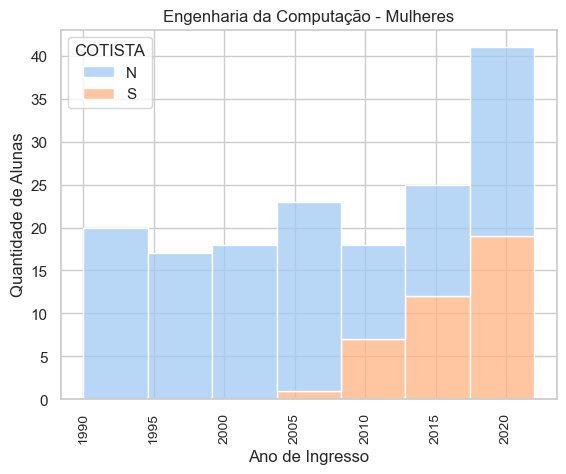

In [21]:
sns.histplot(data=eng_femi, x="ANO_INGRESSO", hue="COTISTA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)
plt.ylabel('Quantidade de Alunas')
plt.xlabel('Ano de Ingresso')
plt.title("Engenharia da Computação - Mulheres")

Text(0.5, 1.0, 'Engenharia da Computação')

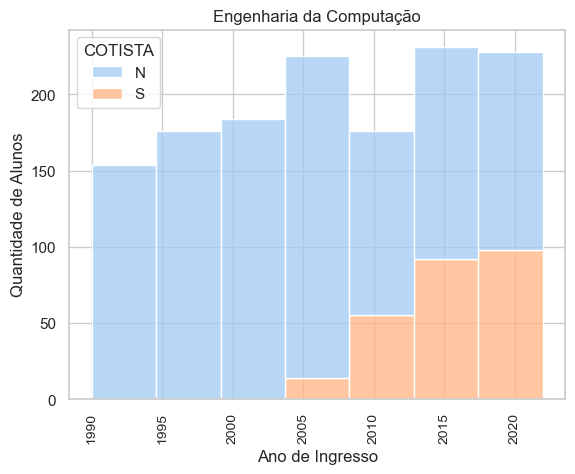

In [22]:
sns.histplot(data=eng, x="ANO_INGRESSO", hue="COTISTA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)
plt.ylabel('Quantidade de Alunos')
plt.xlabel('Ano de Ingresso')
plt.title("Engenharia da Computação")

Text(0.5, 1.0, 'Ciência da Computação')

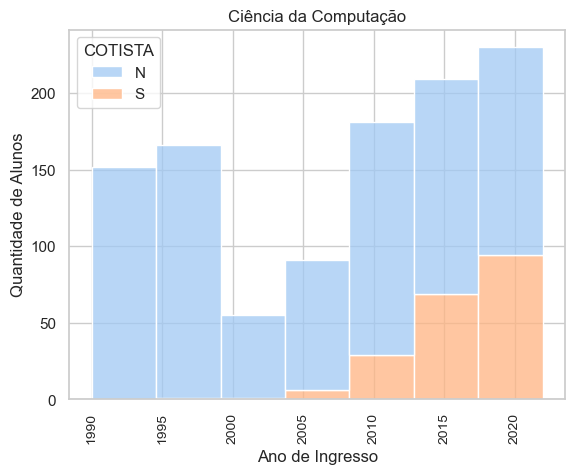

In [23]:
sns.histplot(data=ccomp, x="ANO_INGRESSO", hue="COTISTA",multiple="stack",bins=7)
plt.xticks(fontsize=10,rotation=90)
plt.ylabel('Quantidade de Alunos')
plt.xlabel('Ano de Ingresso')
plt.title("Ciência da Computação")

<AxesSubplot:xlabel='ANO_INGRESSO', ylabel='Count'>

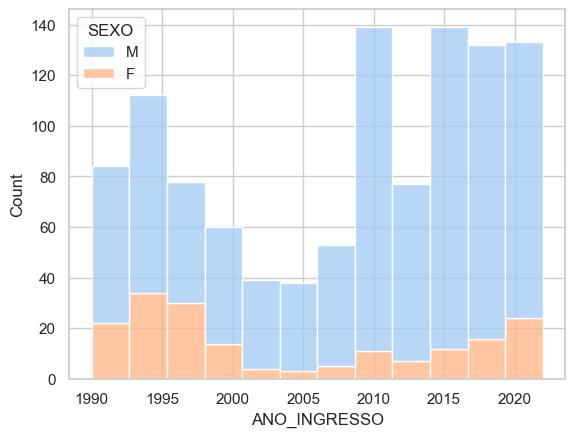

In [342]:
sns.histplot(data=df_cie, x="ANO_INGRESSO", hue="SEXO",multiple="stack")

<AxesSubplot:xlabel='ANO_INGRESSO', ylabel='Count'>

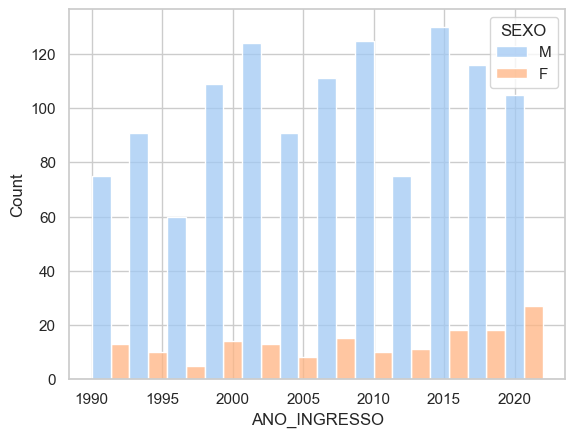

In [343]:
sns.histplot(data=df_eng, x="ANO_INGRESSO", hue="SEXO",multiple="dodge")

## Funções

In [344]:
def crosstabper_linha(df,col):

  tab = pd.crosstab(df[col],df['SEXO'])
  

  tabper = pd.crosstab(df[col],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
  
  return tab,tabper


In [345]:
def crosstabper(df, col):
  
  #total por linha
  tab = pd.crosstab(df[col],df['SEXO'])
  #tab["TOTAL"] = tab["F"] + tab["M"]
  
  #total por coluna
  tabper = pd.crosstab(df[col],df['SEXO']).apply(lambda r: r/r.sum(), axis=0) * 100
  
  return tab,tabper

In [346]:
def classes(row):
  if (row.ANO_INGRESSO >= 1900) & (row.ANO_INGRESSO < 1995):
    return "1990-1994"
  elif (row.ANO_INGRESSO >= 1995) & (row.ANO_INGRESSO < 2000):
    return "1995-1999"
  elif (row.ANO_INGRESSO >= 2000 ) & (row.ANO_INGRESSO < 2005):
    return "2000-2004"
  elif (row.ANO_INGRESSO >= 2005 ) & (row.ANO_INGRESSO < 2010):
    return "2005-2009"
  elif (row.ANO_INGRESSO >= 2010 ) & (row.ANO_INGRESSO < 2015):
    return "2010-2014"
  elif (row.ANO_INGRESSO >= 2015 ) & (row.ANO_INGRESSO < 2020):
    return "2015-2019"
  else:
    return "2020-"

df["INTERVALO_ANO"] = df.apply(classes, axis=1)
df_cie["INTERVALO_ANO"] = df_cie.apply(classes, axis=1)
df_eng["INTERVALO_ANO"] = df_eng.apply(classes, axis=1)


C:\Users\USER\AppData\Local\Temp\ipykernel_16104\16457832.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cie["INTERVALO_ANO"] = df_cie.apply(classes, axis=1)
C:\Users\USER\AppData\Local\Temp\ipykernel_16104\16457832.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng["INTERVALO_ANO"] = df_eng.apply(classes, axis=1)


## Dependência entre variáveis

In [347]:
tab_ingresso, tabper_ingresso = crosstabper_linha(df,"ANO_INGRESSO")
tabper_ingresso

SEXO,F,M
ANO_INGRESSO,,
1990,24.489796,75.510204
1991,16.393443,83.606557
1992,20.967742,79.032258
1993,23.880597,76.119403
1994,14.925373,85.074627
1995,22.784810,77.215190
1996,26.760563,73.239437
1997,22.222222,77.777778
1998,19.672131,80.327869


In [348]:
tabper_ingresso.describe()

SEXO,F,M
count,33.000000,33.000000
mean,14.176485,85.823515
std,6.657434,6.657434
min,3.703704,71.604938
25%,8.771930,80.327869
50%,13.333333,86.666667
75%,19.672131,91.228070
max,28.395062,96.296296


In [349]:
ec_tab_ingresso, ec_tabper_ingresso = crosstabper_linha(eng,"ANO_INGRESSO")
ec_tabper_ingresso

SEXO,F,M
ANO_INGRESSO,,
1990,16.666667,83.333333
1991,11.111111,88.888889
1992,16.129032,83.870968
1993,12.121212,87.878788
1994,9.090909,90.909091
1995,8.571429,91.428571
1996,12.121212,87.878788
1997,3.125000,96.875000
1998,14.705882,85.294118


In [350]:
ec_tabper_ingresso.describe()

SEXO,F,M
count,33.000000,33.000000
mean,11.836669,88.163331
std,6.377183,6.377183
min,3.125000,62.500000
25%,8.333333,85.294118
50%,11.111111,88.888889
75%,14.705882,91.666667
max,37.500000,96.875000


In [351]:
cc_tab_ingresso, cc_tabper_ingresso = crosstabper_linha(ccomp,"ANO_INGRESSO")
cc_tabper_ingresso

SEXO,F,M
ANO_INGRESSO,,
1990,36.842105,63.157895
1991,20.588235,79.411765
1992,25.806452,74.193548
1993,35.294118,64.705882
1994,20.588235,79.411765
1995,34.090909,65.909091
1996,39.473684,60.526316
1997,37.500000,62.500000
1998,25.925926,74.074074


In [285]:
sliced = eng[eng["ANO_INGRESSO"] >= 2014]
sliced = sliced[sliced['ANO_INGRESSO'] < 2021]
sliced_ingresso, sliced_ingresso_per = crosstabper_linha(sliced,"ANO_INGRESSO")

In [286]:
sliced_ingresso_per.describe()

SEXO,F,M
count,7.000000,7.000000
mean,13.716132,86.283868
std,4.417360,4.417360
min,8.333333,80.392157
25%,10.025063,83.132045
50%,14.285714,85.714286
75%,16.867955,89.974937
max,19.607843,91.666667


In [287]:
cc_tabper_ingresso.describe()

SEXO,F,M
count,33.000000,33.000000
mean,16.550484,83.449516
std,11.341735,11.341735
min,0.000000,60.526316
25%,6.250000,77.083333
50%,15.094340,84.905660
75%,22.916667,93.750000
max,39.473684,100.000000


### Forma de Evasão - Geral

In [288]:
tab_evasao, tabper_evasao = crosstabper(df,"FORMA_EVASAO")
tabper_evasao

SEXO,F,M
FORMA_EVASAO,,
Cursando,22.093023,18.164617
Desistência,17.151163,17.407758
Desligado,15.116279,24.550615
Falecimento,0.000000,0.047304
Formado,41.279070,35.004730
Reopção,2.034884,2.790918
Transferência,2.325581,2.034059


In [289]:
stat, p, dof, expected = chi2_contingency(tab_evasao)
  
alpha = 0.05
print("Geral")
print("p valor é " + str(p))
if p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Geral
p valor é 0.00636795474579937
Dependência (rejeita H0)


In [290]:
stacked = tabper_evasao.stack().reset_index().rename(columns={0:'value'})
sorted = stacked.sort_values(['value',"FORMA_EVASAO"],ascending=False)

In [291]:
palette ={"M": "C0", "F": "C1"}

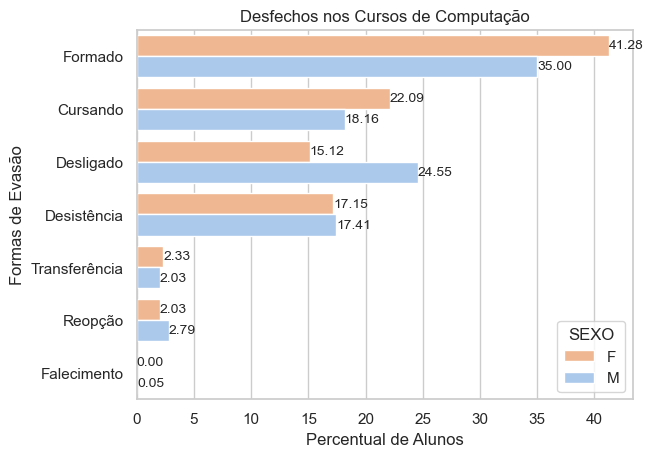

In [292]:
ax = sns.barplot(x=sorted.value, y=sorted["FORMA_EVASAO"], hue=sorted.SEXO, palette=palette,order=ccomp_order)
ax.set_title("Desfechos nos Cursos de Computação")
ax.set_ylabel("Formas de Evasão")
ax.set_xlabel("Percentual de Alunos")
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f',fontsize=10)

### Forma de Evasão - por Curso

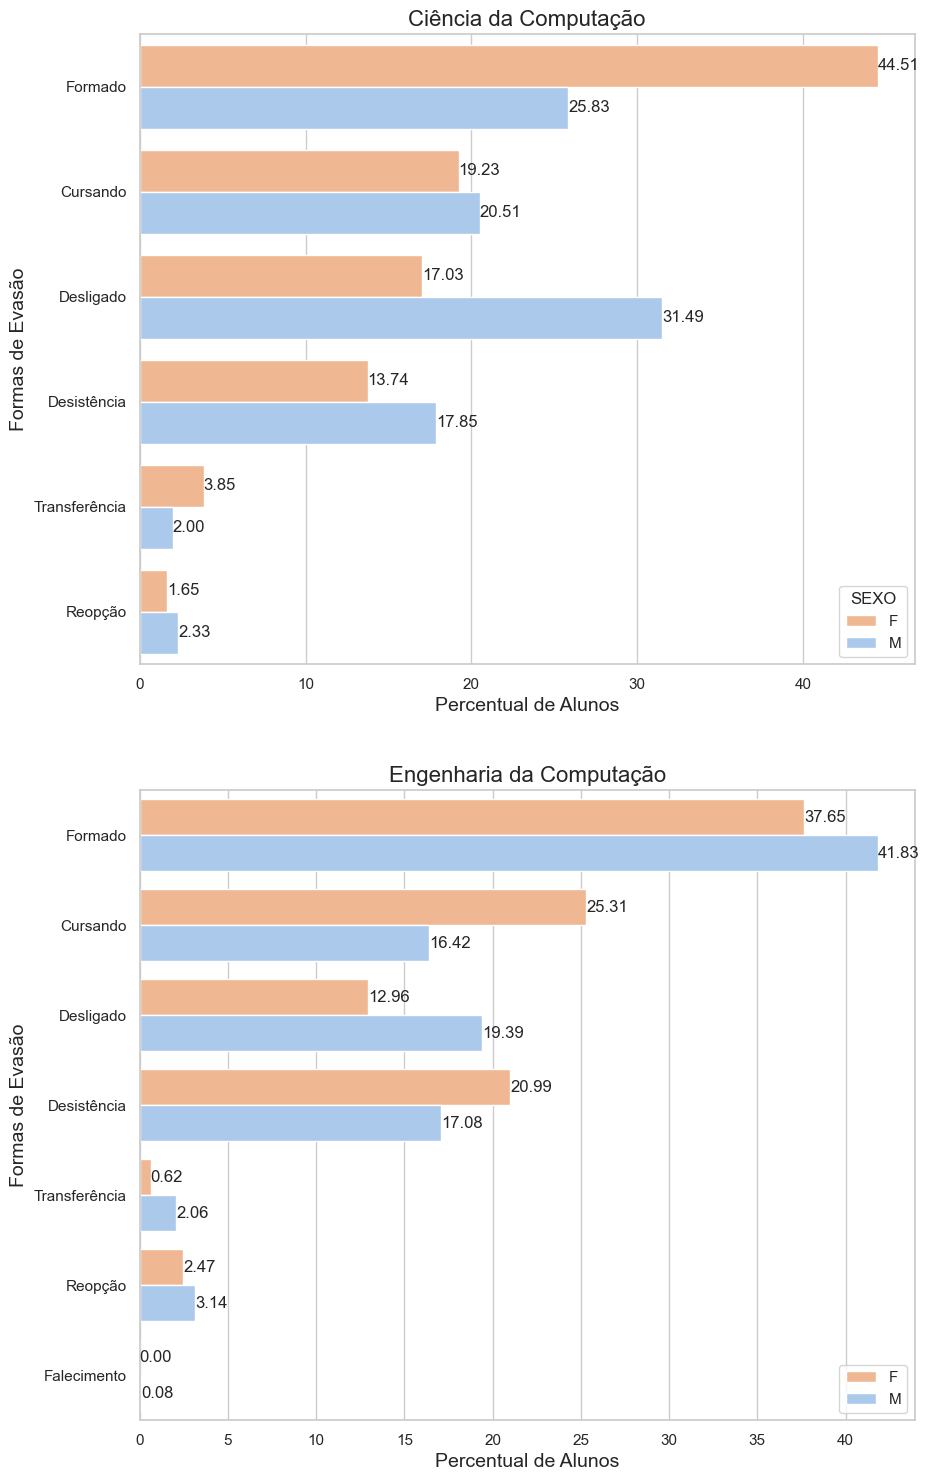

In [293]:
cc_tab_evasao, ccomp_tabper_evasao = crosstabper(ccomp,"FORMA_EVASAO")
ec_tab_evasao, eng_tabper_evasao = crosstabper(eng,"FORMA_EVASAO")

ccomp_stacked = ccomp_tabper_evasao.stack().reset_index().rename(columns={0:'value'})
ccomp_sorted = ccomp_stacked.sort_values(by=["SEXO", "value", "FORMA_EVASAO"], ascending=[True, False, False])

eng_stacked = eng_tabper_evasao.stack().reset_index().rename(columns={0:'value'})
eng_sorted = eng_stacked.sort_values(by=["SEXO","value", "FORMA_EVASAO"], ascending=[True,False, True])

ccomp_order = list(ccomp_sorted["FORMA_EVASAO"].unique())
ccomp_order.append("Falecimento")
fig, axs = plt.subplots(2,1, figsize=(10,18))
sns.barplot(x=ccomp_sorted.value, y=ccomp_sorted["FORMA_EVASAO"], hue=ccomp_sorted.SEXO,ax=axs[0],palette=palette)
sns.barplot(x=eng_sorted.value, y=eng_sorted["FORMA_EVASAO"], hue=eng_sorted.SEXO,ax=axs[1],palette=palette,order=ccomp_order)
axs[0].set_title("Ciência da Computação",fontsize=16)
axs[0].set_ylabel("Formas de Evasão",fontsize=14)
axs[0].set_xlabel("Percentual de Alunos",fontsize=14)
for i in axs[0].containers:
    axs[0].bar_label(i,fmt='%.2f')
axs[1].set_title("Engenharia da Computação",fontsize=16)
axs[1].set_ylabel("Formas de Evasão",fontsize=14)
axs[1].set_xlabel("Percentual de Alunos",fontsize=14)
for i in axs[1].containers:
    axs[1].bar_label(i,fmt='%.2f')

plt.legend(loc="lower right")
plt.show()



In [294]:
cc_stat, cc_p, cc_dof, cc_expected = chi2_contingency(cc_tab_evasao)

ec_stat, ec_p, ec_dof, ec_expected = chi2_contingency(ec_tab_evasao)

print("Ciência")
print("p valor é " + str(cc_p))
if cc_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

print("Engenharia")
print("p valor é " + str(ec_p))
if ec_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Ciência
p valor é 3.2847192200085672e-06
Dependência (rejeita H0)
Engenharia
p valor é 0.03711882628015684
Dependência (rejeita H0)


### Cotista - Geral

In [295]:
tab_cota, tabper_cota = crosstabper(df,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
N,82.848837,81.078524
S,17.151163,18.921476


In [362]:
tab_cota, tabper_cota = crosstabper_linha(cotistas,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
S,12.854031,87.145969


In [368]:
tab_cota, tabper_cota = crosstabper_linha(cotas_cc,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
S,10.0,90.0


In [369]:
tab_cota, tabper_cota = crosstabper_linha(cotas_eng,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
S,15.057915,84.942085


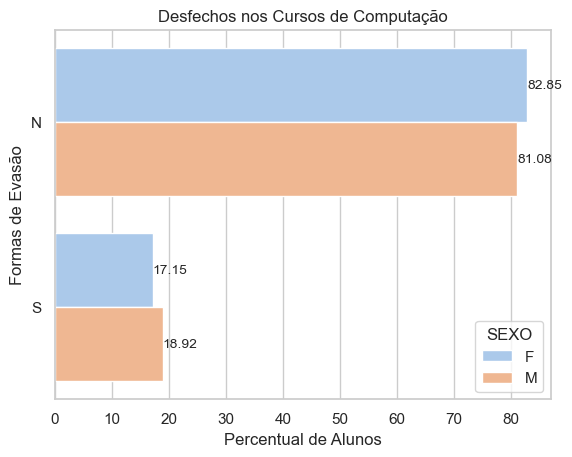

In [296]:
cotas_stacked = tabper_cota.stack().reset_index().rename(columns={0:'value'})
cotas_sorted = cotas_stacked.sort_values(['value',"COTISTA"],ascending=False)
ax = sns.barplot(x=cotas_sorted.value, y=cotas_sorted["COTISTA"], hue=cotas_sorted.SEXO)
ax.set_title("Desfechos nos Cursos de Computação")
ax.set_ylabel("Formas de Evasão")
ax.set_xlabel("Percentual de Alunos")
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f',fontsize=10)

In [357]:
comp_stat, comp_p, comp_dof, comp_expected = chi2_contingency(tab_cota)


print("Geral")
print("p valor é " + str(cc_p))
if cc_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Geral
p valor é 6.446640677563807e-45
Dependência (rejeita H0)


### Cotas - Por Curso

In [297]:
cc_tab_cota, cc_tabper_cota = crosstabper(ccomp,"COTISTA")
cc_tabper_cota

SEXO,F,M
COTISTA,,
N,89.010989,80.044346
S,10.989011,19.955654


In [298]:
eng_tab_cota, eng_tabper_cota = crosstabper(eng,"COTISTA")
eng_tabper_cota

SEXO,F,M
COTISTA,,
N,75.925926,81.848185
S,24.074074,18.151815


In [358]:
cc_stat, cc_p, cc_dof, cc_expected = chi2_contingency(cc_tab_cota)

ec_stat, ec_p, ec_dof, ec_expected = chi2_contingency(eng_tab_cota)

print("Ciência")
print("p valor é " + str(cc_p))
if cc_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

print("Engenharia")
print("p valor é " + str(ec_p))
if ec_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Ciência
p valor é 0.006144041424037965
Dependência (rejeita H0)
Engenharia
p valor é 0.0885390085047568
Independência


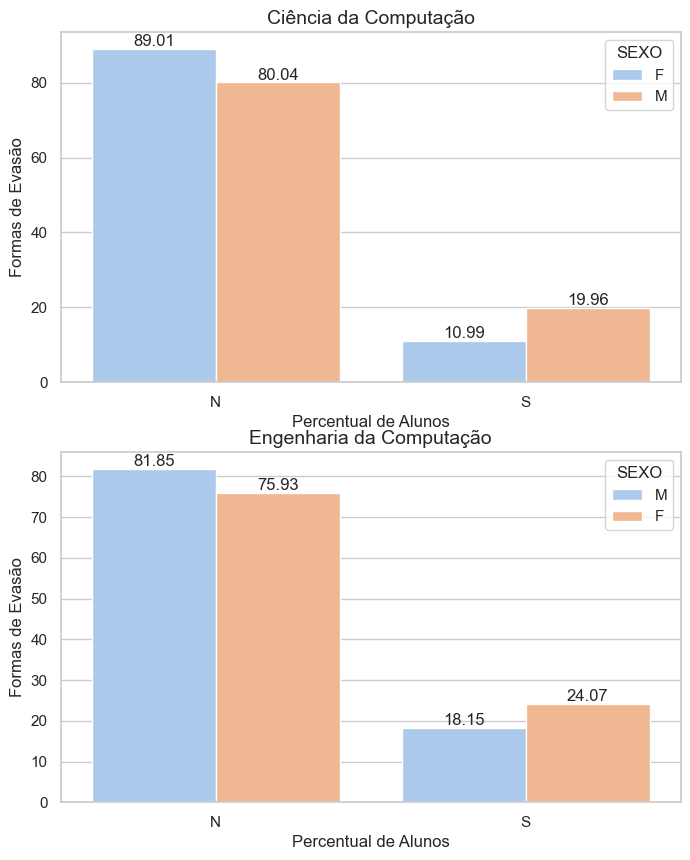

In [299]:
cc_tab_cota, cc_tabper_cota = crosstabper(ccomp,"COTISTA")
eng_tab_cota, eng_tabper_cota = crosstabper(eng,"COTISTA")

cc_cotas_stacked = cc_tabper_cota.stack().reset_index().rename(columns={0:'value'})
cc_cotas_sorted = cc_cotas_stacked.sort_values(['value',"COTISTA"],ascending=False)

eng_cotas_stacked = eng_tabper_cota.stack().reset_index().rename(columns={0:'value'})
eng_cotas_sorted = eng_cotas_stacked.sort_values(['value',"COTISTA"],ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(8,10))
sns.barplot(x=cc_cotas_sorted["COTISTA"], y=cc_cotas_sorted.value, hue=cc_cotas_sorted.SEXO,ax=axs[0])
sns.barplot( x=eng_cotas_sorted["COTISTA"], y=eng_cotas_sorted.value, hue=eng_cotas_sorted.SEXO,ax=axs[1])
axs[0].set_title("Ciência da Computação", fontsize=14)
axs[0].set_ylabel("Formas de Evasão")
axs[0].set_xlabel("Percentual de Alunos")
for i in axs[0].containers:
    axs[0].bar_label(i,fmt='%.2f')
axs[1].set_title("Engenharia da Computação", fontsize=14)
axs[1].set_ylabel("Formas de Evasão")
axs[1].set_xlabel("Percentual de Alunos")
for i in axs[1].containers:
    axs[1].bar_label(i,fmt='%.2f')

plt.show()

In [353]:
tab_etnia, tabper_etnia = crosstabper(eng,"ETNIA")
tabper_etnia

SEXO,F,M
ETNIA,,
Amarela,0.617284,0.495050
Branca,70.370370,76.815182
Indígena,0.000000,0.330033
Não Declarada,4.320988,1.897690
Não informado,0.000000,0.082508
Parda,19.753086,16.831683
Preta,4.938272,3.547855


In [301]:
tab_estadocivil, tabper_estadocivil = crosstabper(df,"ESTADO_CIVIL")
tabper_estadocivil

SEXO,F,M
ESTADO_CIVIL,,
Casado(a),3.834808,5.250597
Divorciado(a),0.294985,0.238663
Outros,0.000000,0.095465
Separado Judicialmente,0.000000,0.047733
Separado(a) Judicialmente,0.294985,0.000000
Solteiro(a),94.985251,93.985680
Uniao Estavel,0.589971,0.381862


In [302]:
tab_idade, tabper_idade = crosstabper(df,"IDADE")
tabper_idade

SEXO,F,M
IDADE,,
16.0,0.000000,0.047416
16.5,0.292398,0.142248
16.6,0.000000,0.142248
16.7,0.000000,0.047416
16.8,0.292398,0.331911
...,...,...
49.9,0.000000,0.047416
50.1,0.000000,0.047416
52.4,0.000000,0.047416


In [303]:
tab_curso, tabper_curso = crosstabper(df,"COD_CURSO")
tabper_curso

SEXO,F,M
COD_CURSO,,
5,47.093023,57.332072
11,52.906977,42.667928


In [304]:
tab_municipio, tabper_municipio = crosstabper(df,"MUNICIPIO")
tabper_municipio

SEXO,F,M
MUNICIPIO,,
03 B.REPUBLICA VIT.,0.000000,0.051256
ADAMANTINA,0.000000,0.051256
AFONSO CLAUDIO,0.000000,0.153767
AGUIA BRANCA,0.000000,0.051256
ALEGRE,0.000000,0.153767
...,...,...
Vila Valerio,0.000000,0.051256
Vila Velha,2.795031,1.845208
Vitoria,2.795031,2.870323


In [305]:
tab_estado, tabper_estado = crosstabper(df,"ESTADO")
tabper_estado

SEXO,F,M
ESTADO,,
Bahia,0.000000,0.171233
Ceará,0.000000,0.085616
ES,0.709220,2.825342
Espirito Santo,51.773050,69.691781
EspÃ­rito Santo,1.418440,1.369863
Espírito Santo,43.971631,24.486301
Estados de Outros Países,0.000000,0.256849
MA,0.709220,0.000000
Minas Gerais,0.709220,0.599315
